In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import csv
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [2]:
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')
df_test = pd.read_csv('application_test.csv')

In [3]:
#виведемо данні df_train
print('Rows and column: ', df_train.shape)
df_train.head(10)

Rows and column:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#виведемо данні df_test
print('Rows and column:', df_test.shape)
df_test.head(10)

Rows and column: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [5]:
#тип данних
df_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [6]:
df_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [7]:
df_train.info(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
#розбавання данних на типи(в даному випадку на categorical)
columns_list = list(df_train.columns)
i = 0
category_features = set()
for column_type in df_train.dtypes:
    if column_type == 'object' or 'FLAG' in columns_list[i] or 'LIVE_' in columns_list[i] or 'REG_' in columns_list[i]:
        category_features.add(columns_list[i])
        df_train[columns_list[i]] = df_train[columns_list[i]].astype('category')
    i = i + 1
print(category_features)
len(category_features)

{'NAME_FAMILY_STATUS', 'FLAG_CONT_MOBILE', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_17', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_PHONE', 'FLAG_DOCUMENT_18', 'WALLSMATERIAL_MODE', 'NAME_CONTRACT_TYPE', 'FLAG_DOCUMENT_7', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_16', 'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_21', 'HOUSETYPE_MODE', 'FLAG_MOBIL', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_12', 'FLAG_OWN_REALTY', 'ORGANIZATION_TYPE', 'NAME_EDUCATION_TYPE', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'FLAG_OWN_CAR', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_13', 'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'WEEKDAY_APPR_PROCESS_START', 'CODE_GENDER', 'OCCUPATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_TYPE_SUITE', 'FLAG_DOCUMENT_9', 'FLAG_EMAIL', 'FONDKAPREMONT_MODE', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_2', 'EMERGENCYSTATE_MODE', 'NAME_INCOME_TYPE', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_3'}


48

In [9]:
#передаємо на нову змінну categorical значення з var_train
categorical_df_train = df_train.select_dtypes(include = ['category']).copy()
print('Rows and column: ', categorical_df_train.shape)
categorical_df_train.head()

Rows and column:  (307511, 48)


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,...,0,0,0,0,0,0,0,0,0,0
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,1,...,0,0,0,0,0,0,0,0,0,0
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,...,0,0,0,0,0,0,0,0,0,0
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,1,...,0,0,0,0,0,0,0,0,0,0
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#перевірка на missing value
categorical_df_train.isnull().sum()

NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
OCCUPATION_TYPE                 96391
WEEKDAY_APPR_PROCESS_START          0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT_WORK_CITY              0
LIVE_CITY_NOT_WORK_CITY             0
ORGANIZATION_TYPE                   0
FONDKAPREMONT_MODE             210295
HOUSETYPE_MODE                 154297
WALLSMATERIA

In [11]:
#заповнення модою missing value
def fill_with_mode(df):
    i = 0
    df_train_features_list = list(df)
    for number in df.isnull().sum():
        if number > 0:
            df[df_train_features_list[i]] = df[df_train_features_list[i]].fillna(df[df_train_features_list[i]].value_counts().index[0])
        i = i + 1

In [12]:
#заповнення модою 
fill_with_mode(categorical_df_train)
print('Rows and column: ', categorical_df_train.shape)
print()
print(categorical_df_train.isnull().sum())

Rows and column:  (307511, 48)

NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
WEEKDAY_APPR_PROCESS_START     0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
FONDKAPREMONT_MODE             0
HOUSETYPE_MODE                 0
WALLSMATERIAL_MODE             0
EMERGENCYSTATE_MODE            0
FLAG_DOCUMENT_2                0
FLAG_DOCUME

In [13]:
#заміняємо тип categoria
def label_encoding(df, help_df=None, flag_help = False):
    if flag_help:
        cat = df.copy()
        for feature in help_df:
            labels = cat[feature].astype('category').cat.categories.tolist()
            replace_map_comp = {feature : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
            cat.replace(replace_map_comp, inplace=True)
        return cat
    else:
        cat = df.copy()
        for feature in cat:
            labels = cat[feature].astype('category').cat.categories.tolist()
            replace_map_comp = {feature : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
            cat.replace(replace_map_comp, inplace=True)
        return cat

In [14]:
categorical_df_train_replace = label_encoding(categorical_df_train)

array([[<AxesSubplot:title={'center':'NAME_CONTRACT_TYPE'}>,
        <AxesSubplot:title={'center':'CODE_GENDER'}>,
        <AxesSubplot:title={'center':'FLAG_OWN_CAR'}>,
        <AxesSubplot:title={'center':'FLAG_OWN_REALTY'}>,
        <AxesSubplot:title={'center':'NAME_TYPE_SUITE'}>,
        <AxesSubplot:title={'center':'NAME_INCOME_TYPE'}>,
        <AxesSubplot:title={'center':'NAME_EDUCATION_TYPE'}>],
       [<AxesSubplot:title={'center':'NAME_FAMILY_STATUS'}>,
        <AxesSubplot:title={'center':'NAME_HOUSING_TYPE'}>,
        <AxesSubplot:title={'center':'FLAG_MOBIL'}>,
        <AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_WORK_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_CONT_MOBILE'}>,
        <AxesSubplot:title={'center':'FLAG_PHONE'}>],
       [<AxesSubplot:title={'center':'FLAG_EMAIL'}>,
        <AxesSubplot:title={'center':'OCCUPATION_TYPE'}>,
        <AxesSubplot:title={'center':'WEEKDAY_APPR_PROCESS_START'}>,
        <A

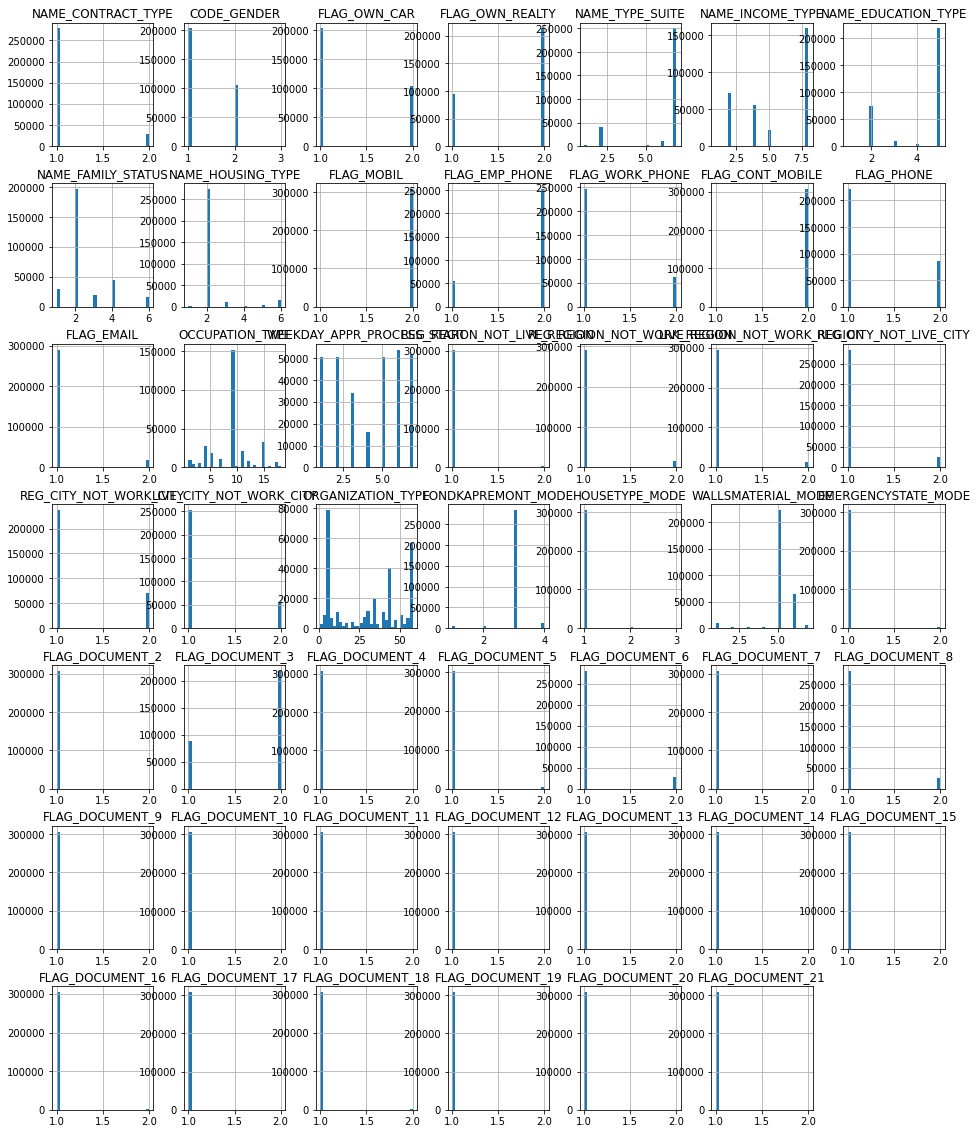

In [15]:
#побудова гістограм
categorical_df_train_replace.hist(figsize=(16,20), bins=30)

In [16]:
categorical_df_train_replace.head(10)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,2,1,2,7,8,5,4,2,2,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,2,5,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,7,8,5,4,2,2,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,2,7,8,5,1,2,2,...,1,1,1,1,1,1,1,1,1,1
4,1,2,1,2,7,8,5,4,2,2,...,1,1,1,1,1,1,1,1,1,1
5,1,2,1,2,6,5,5,2,2,2,...,1,1,1,1,1,1,1,1,1,1
6,1,1,2,2,7,2,2,2,2,2,...,1,1,2,1,1,1,1,1,1,1
7,1,2,2,2,7,5,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
8,1,1,1,2,1,4,5,2,2,2,...,1,1,1,1,1,1,1,1,1,1
9,2,2,1,2,7,8,5,4,2,2,...,1,1,1,1,1,1,1,1,1,1


In [17]:
#беремо тип numerical та прибераэмо id
df_train.drop('SK_ID_CURR', axis='columns', inplace=True)
numerical_features = df_train.select_dtypes(include = ['float64', 'int64']).columns

array([[<AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>],
       [<AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'OWN_CAR_AGE'}>,
        <AxesSubplot:title={'center':'CNT_FAM_MEMBERS'}>,
        <AxesSubplot:title={'center':'REGION_RATING_CLIENT'}>,
        <AxesSubplot:title={'center':'REGION_RATING_CLIENT_W_CITY'}>,
        <AxesSubplot:title={'center':'HOUR_APPR_PROCESS_START'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_1'}>,
        <

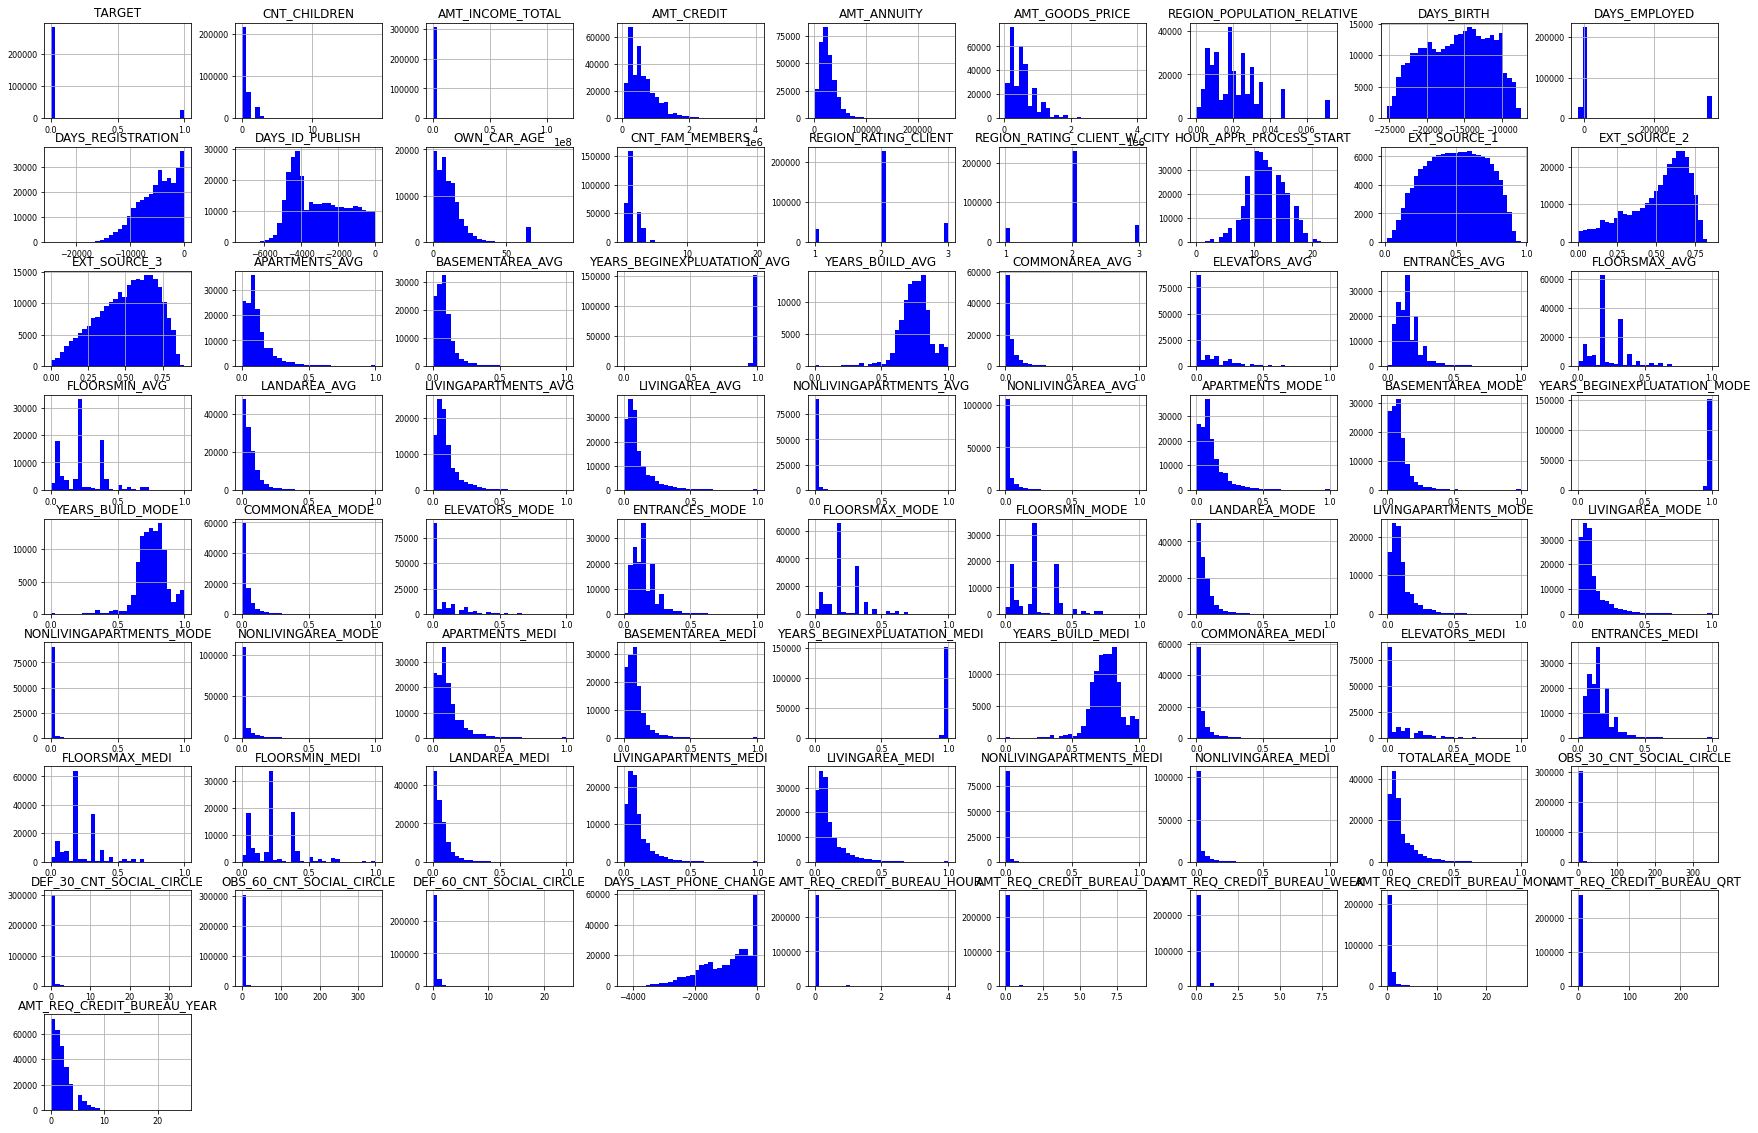

In [18]:
df_train[numerical_features].hist(figsize=(30, 20), color = 'b', bins=30, xlabelsize=8, ylabelsize=8)

In [20]:
df_train_numerical = df_train[numerical_features].copy()
df_train_numerical.isnull().sum()

TARGET                            0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 73, dtype: int64

In [21]:
#заповнюємо missing value

fill_with_mode(df_train_numerical)
print(df_train_numerical.isnull().sum())

TARGET                        0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64


In [22]:
df_train_numerical.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1)
# fig.set_size_inches(10, 200)
# for i, col in enumerate(numerical_features):
#     sns.boxplot(df_train[col], ax=axes[i])
# plt.show()

In [24]:
#матриця
def corr_matrix(df):
    corrMatt = df.corr()
    mask = np.array(corrMatt)
    mask[np.tril_indices_from(mask)] = False
    fig,ax= plt.subplots()
    fig.set_size_inches(90,90)
    sns.heatmap(corrMatt, cmap="Reds", mask=mask,vmax=.8, square=True,annot=True)
    return corrMatt
    

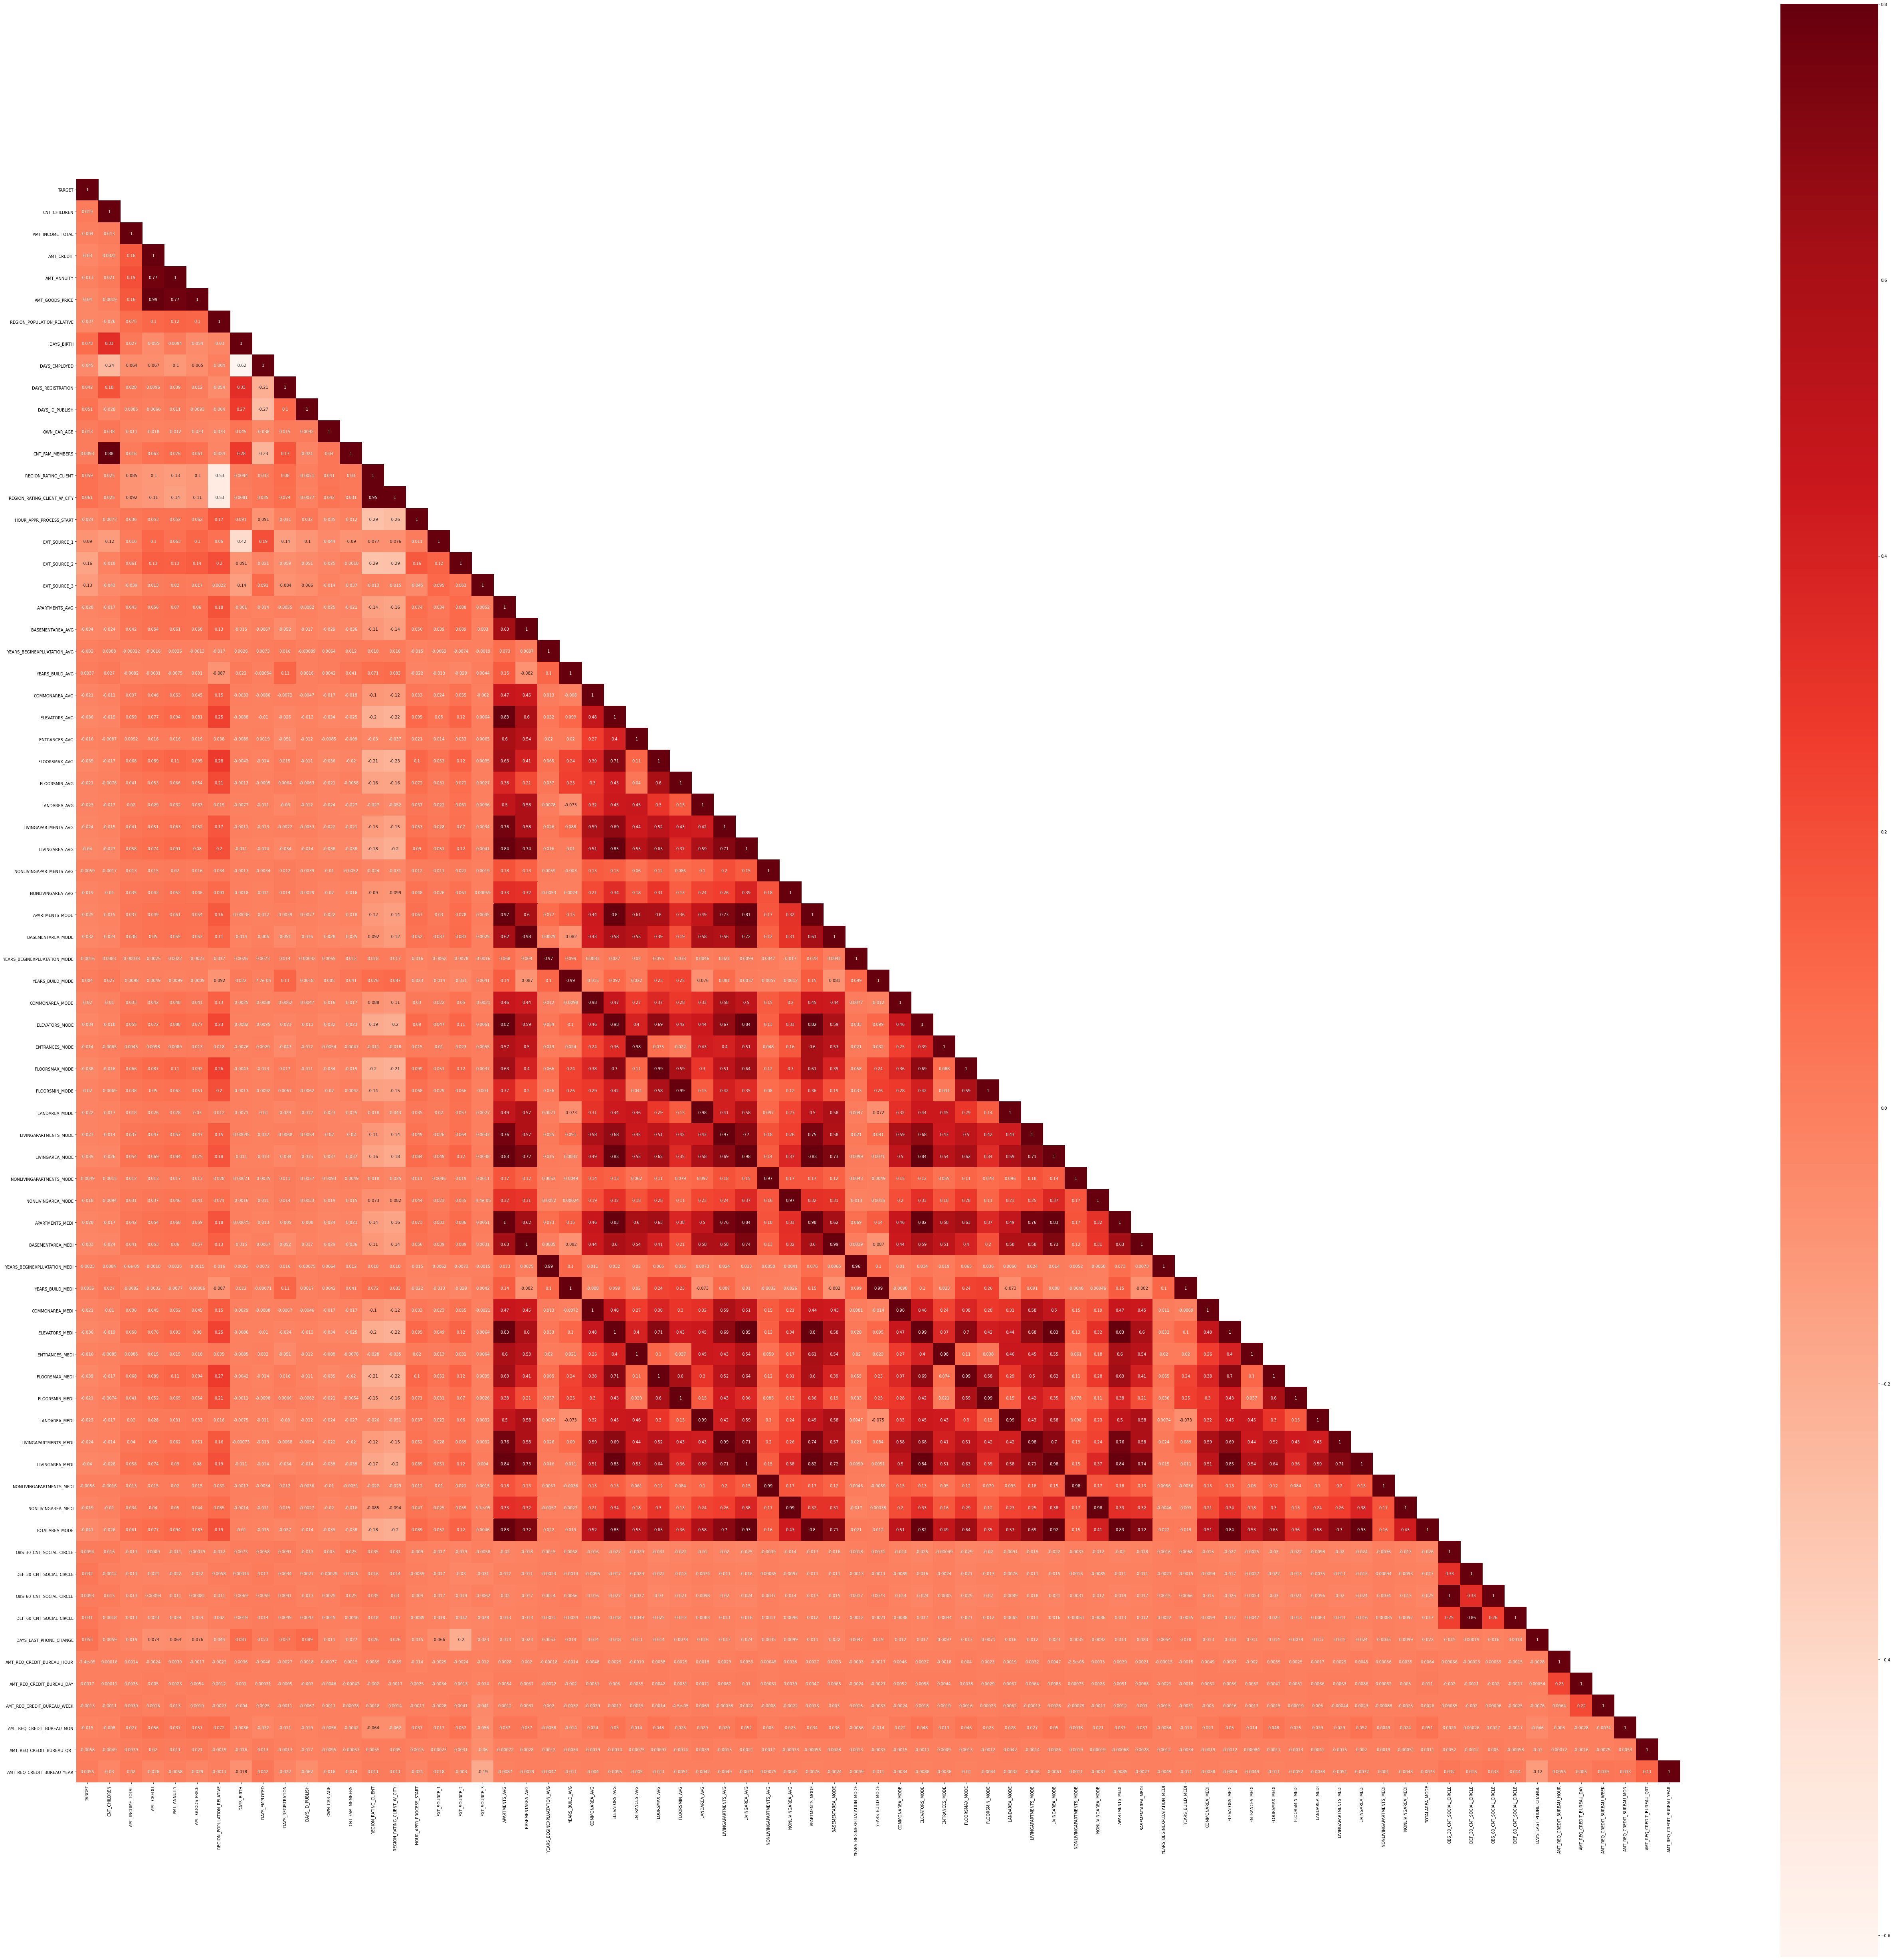

In [25]:
 corrMatt_numerical = corr_matrix(df_train_numerical)

In [26]:
#видаляємо з високим коеф кореляції
def delete_high_corr(df, corrMatt):
    high_correlation_set = set()
    counter = 0
    df_columns = list(df)
    for i in range(len(corrMatt)):
        for j in range(i + 1, len(corrMatt)):
            if corrMatt[df_columns[i]][df_columns[j]] > 0.85:
                high_correlation_set.add(df_columns[j])
                counter = counter + 1
    for feature in high_correlation_set:
        df.drop(feature, axis='columns', inplace=True)

In [27]:
delete_high_corr(df_train_numerical, corrMatt_numerical)
df_train_numerical.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,...,0.0000,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,-291,...,0.0098,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,...,0.0000,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,135000.0,312682.5,29686.5,0.008019,-19005,-3039,-9833.0,-2437,...,0.0000,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,121500.0,513000.0,21865.5,0.028663,-19932,-3038,-4311.0,-3458,...,0.0000,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


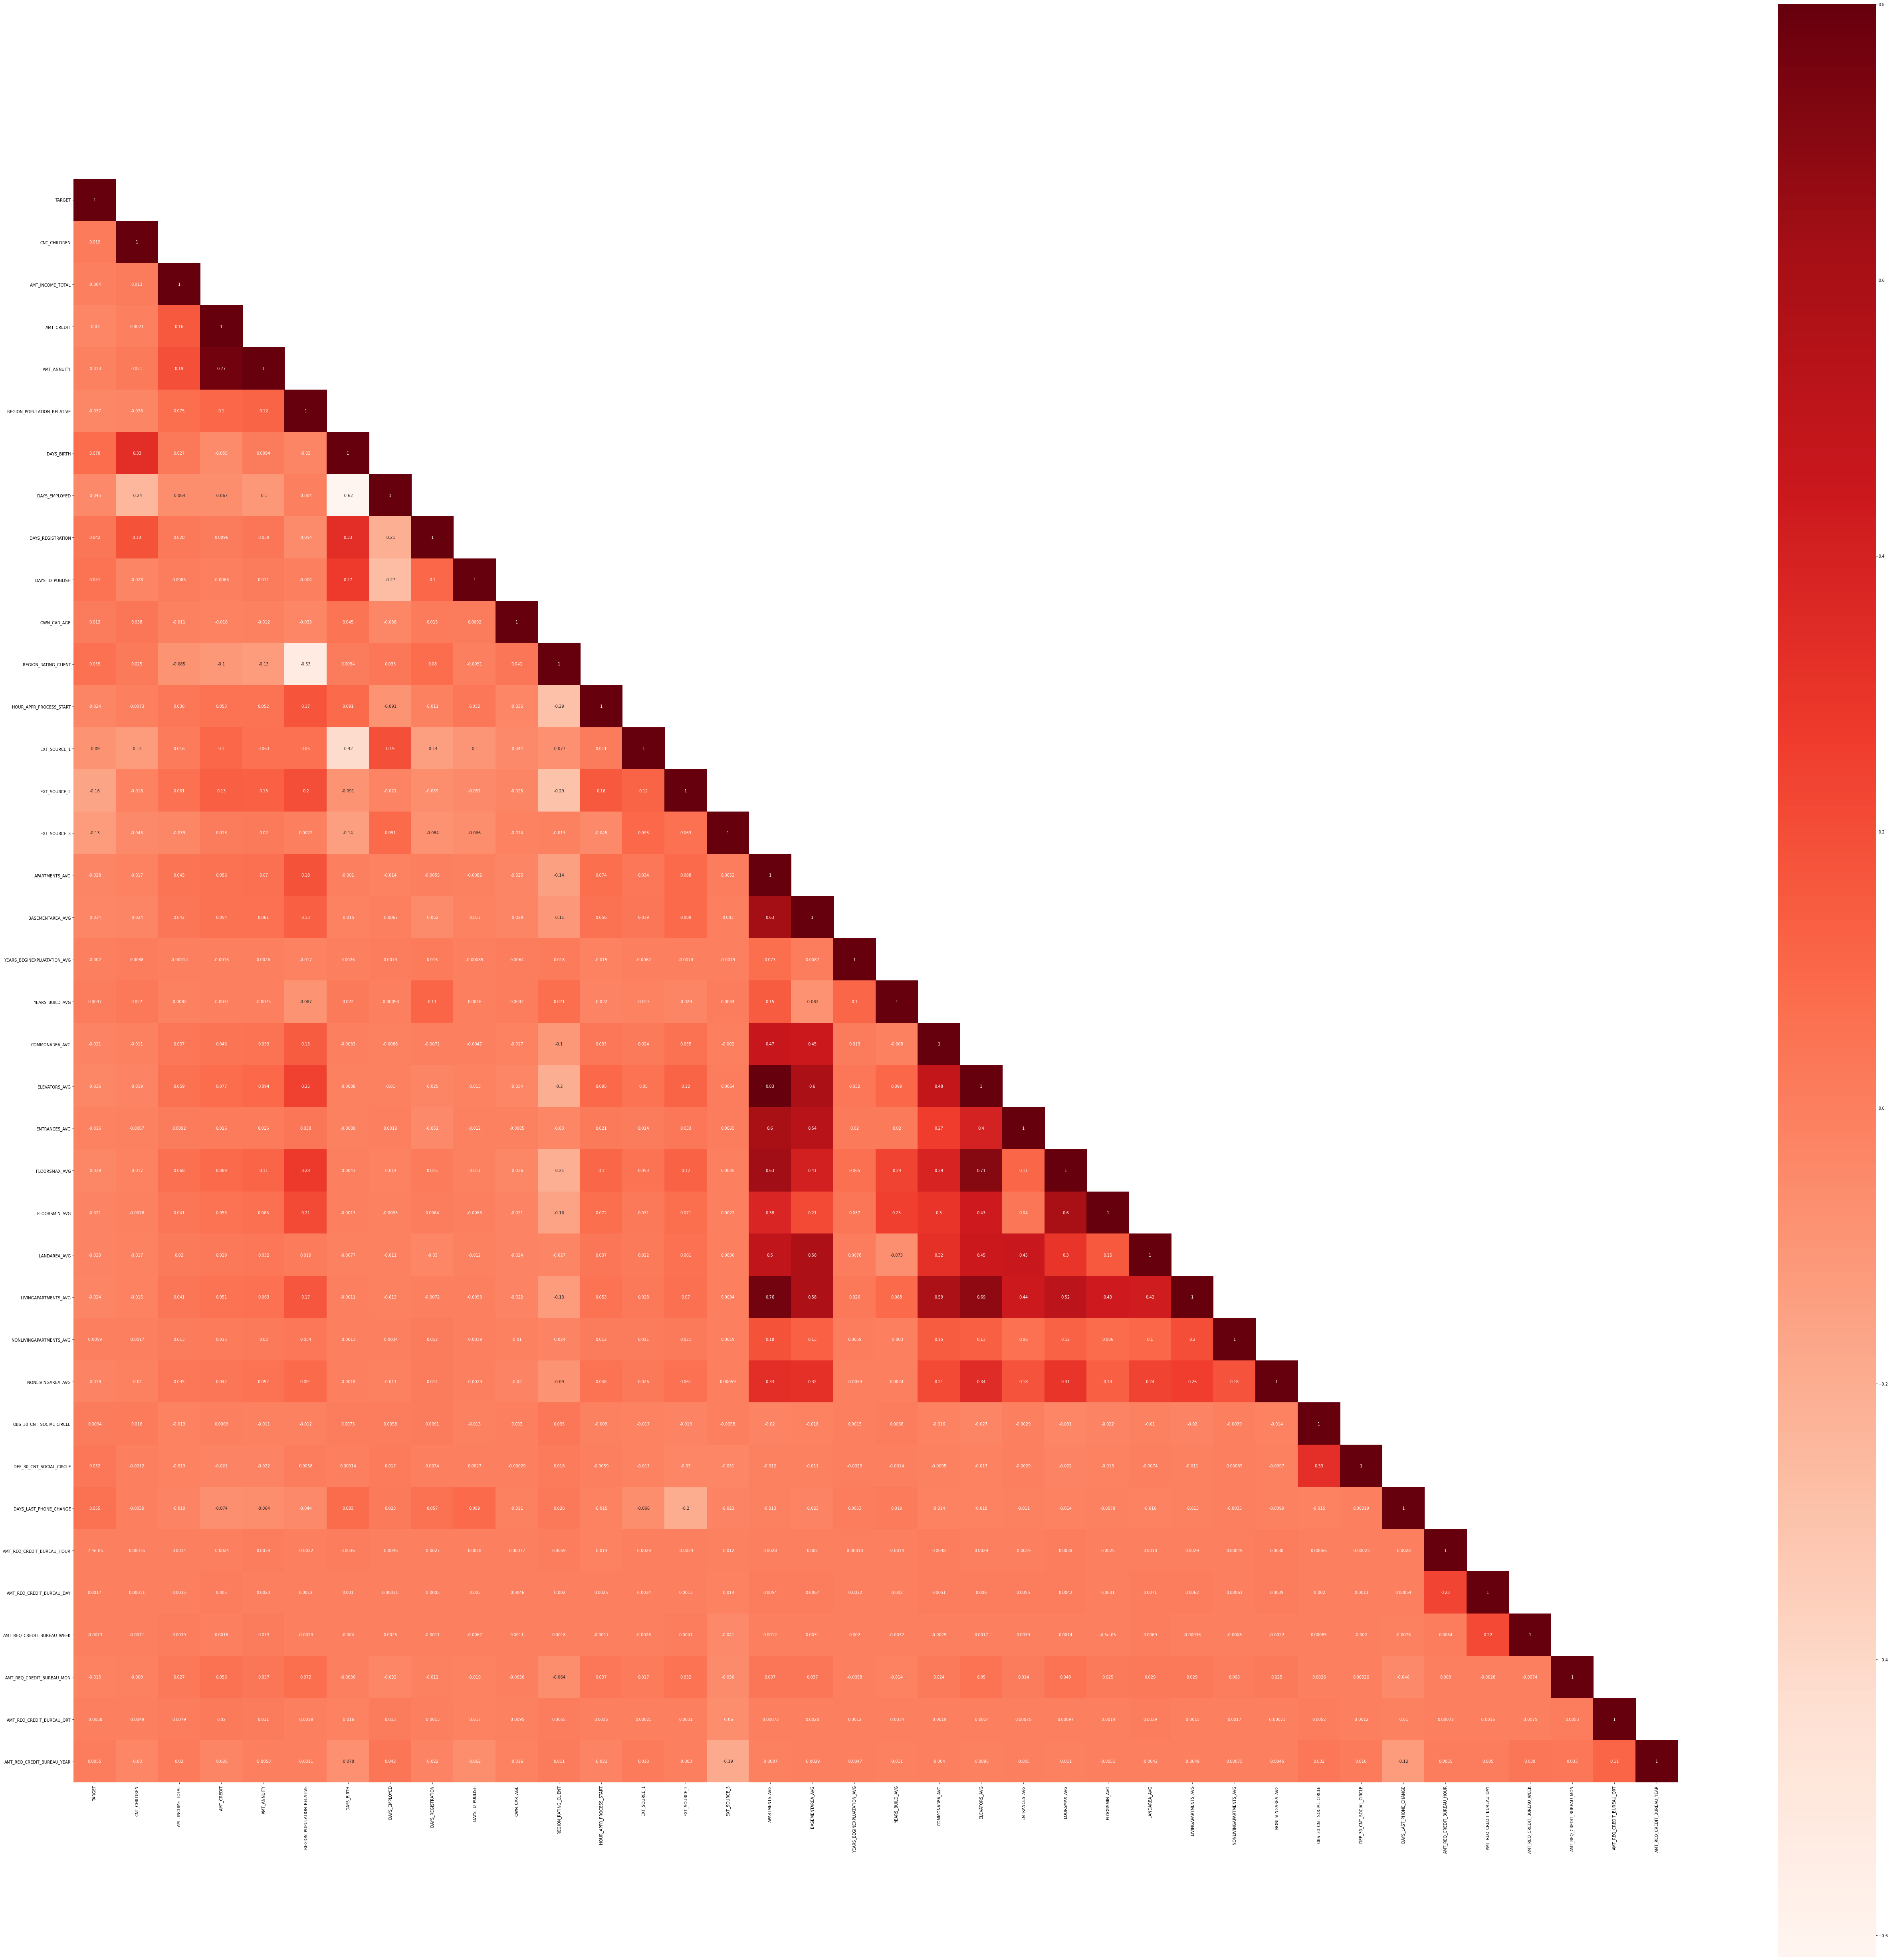

In [28]:
 corrMatt_numerical = corr_matrix(df_train_numerical)

In [29]:
#
train_features = df_train_numerical.copy()
train_features.drop('TARGET', axis='columns', inplace=True)
train_features.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,7.0,...,0.0000,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,-291,7.0,...,0.0098,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,26.0,...,0.0000,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,0.008019,-19005,-3039,-9833.0,-2437,7.0,...,0.0000,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,121500.0,513000.0,21865.5,0.028663,-19932,-3038,-4311.0,-3458,7.0,...,0.0000,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#видаляємо target, створюємо логістичне регресію
lg_result = LogisticRegression()
df_train_numerical.drop('TARGET', axis='columns', inplace=True)
df_train_numerical.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,7.0,...,0.0000,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,-291,7.0,...,0.0098,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,26.0,...,0.0000,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,0.008019,-19005,-3039,-9833.0,-2437,7.0,...,0.0000,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,121500.0,513000.0,21865.5,0.028663,-19932,-3038,-4311.0,-3458,7.0,...,0.0000,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_result = pd.concat([df_train_numerical, categorical_df_train_replace], axis=1)
df_result.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,7.0,...,1,1,1,1,1,1,1,1,1,1
1,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,-291,7.0,...,1,1,1,1,1,1,1,1,1,1
2,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,26.0,...,1,1,1,1,1,1,1,1,1,1
3,0,135000.0,312682.5,29686.5,0.008019,-19005,-3039,-9833.0,-2437,7.0,...,1,1,1,1,1,1,1,1,1,1
4,0,121500.0,513000.0,21865.5,0.028663,-19932,-3038,-4311.0,-3458,7.0,...,1,1,1,1,1,1,1,1,1,1


In [32]:
# corrMatt_result = corr_matrix(df_result)

In [33]:
def scale_scanner(x_train, x_test):
    sc = StandardScaler()
    scaled_x_train = sc.fit_transform(x_train)
    scaled_x_test = sc.transform(x_test)
    return scaled_x_train, scaled_x_test

In [34]:
#робимо розбиття тренувального файлу
train_result_x, test_result_x, train_result_y, test_result_y = train_test_split(df_result, df_train["TARGET"], test_size=0.2)
scaled_train_result_x, scaled_test_result_x = scale_scanner(train_result_x, test_result_x)

lg_result = LogisticRegression()
lg_result.fit(scaled_train_result_x, train_result_y)
train_preds_result = lg_result.predict_proba(scaled_train_result_x)
test_preds_result = lg_result.predict_proba(scaled_test_result_x)

train_preds_result = train_preds_result[:, 1]
test_preds_result = test_preds_result[: , 1]
print(f"Train ROC_AUC: {roc_auc_score(train_result_y, train_preds_result)}")
print(f"Test ROC_AUC: {roc_auc_score(test_result_y, test_preds_result)}")

Train ROC_AUC: 0.7316266688902038
Test ROC_AUC: 0.7317961364395538


In [35]:
#беремо test щоб зробити пердбачення
df_result_test = df_test[list(df_result)].copy()
df_result_test.isnull().sum()

CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                   24
REGION_POPULATION_RELATIVE     0
                              ..
FLAG_DOCUMENT_17               0
FLAG_DOCUMENT_18               0
FLAG_DOCUMENT_19               0
FLAG_DOCUMENT_20               0
FLAG_DOCUMENT_21               0
Length: 85, dtype: int64

In [36]:
fill_with_mode(df_result_test)
df_result_test.isnull().sum()

CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
REGION_POPULATION_RELATIVE    0
                             ..
FLAG_DOCUMENT_17              0
FLAG_DOCUMENT_18              0
FLAG_DOCUMENT_19              0
FLAG_DOCUMENT_20              0
FLAG_DOCUMENT_21              0
Length: 85, dtype: int64

In [37]:
df_result_test = label_encoding(df_result_test, flag_help = True, help_df = categorical_df_train_replace)

In [38]:
Final = StandardScaler().fit_transform(df_result_test)
last_result = lg_result.predict_proba(Final)
last_result = last_result[: , 1]
my_submission = pd.DataFrame({'SK_ID_CURR' : df_test.SK_ID_CURR, 'TARGET' : last_result})
my_submission.to_csv('submission.csv', index = False)